## 1. Author Distribution 

1 Arthur Conan Doyle
2 Charles Darwin
3 Charles Dickens
4 Edith Wharton
5 George Eliot
6 Horace Greeley
7 Jack London
8 James Baldwin
9 Jane Austen
10 John Muir
11 Joseph Conrad
12 Mark Twain
13 Nathaniel Hawthorne
14 Ralph Emerson
15 Robert Louis Stevenson
16 Rudyard Kipling
17 Sinclair Lewis
18 Theodore Dreiser
19 Thomas Hardy
20 Walt Whitman
21 Washington Irving
22 William Carleton
23 Albert Ross
24 Anne Manning
25 Arlo Bates
26 Bret Harte
27 Catharine Maria Sedgwick
28 Charles Reade
29 Edward Eggleston
30 Fergus Hume
31 Frances Hodgson Burnett
32 George Moore
33 George William Curtis
34 Helen Mathers
35 Henry Rider Haggard
36 Isabella Lucy Bird
37 Jacob Abbott
38 James Grant
39 James Payn
40 John Kendrick Bangs
41 John Pendleton Kennedy
42 John Strange Winter
43 Lucas Malet
44 Marie Corelli
45 Oliver Optic
46 Sarah Orne Jewett
47 Sarah Stickney Ellis
48 Thomas Anstey Guthrie
49 Thomas Nelson Page
50 William Black


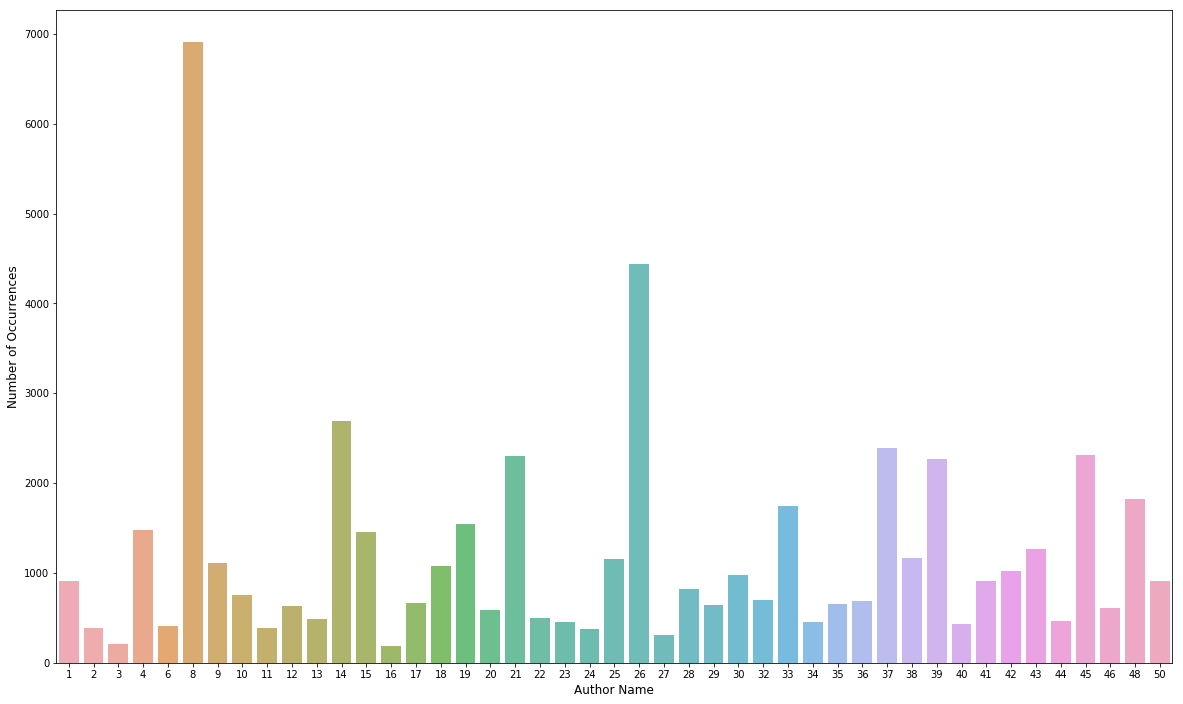

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io
test_author = scipy.io.loadmat('test_author.mat')["test_author"]

train_df = pd.read_csv("train1.csv", encoding='utf-8')
test_df = pd.read_csv("test1.csv", encoding='utf-8')
f = open('author_list.txt', 'r')
author_list = f.read().split('\n')
f.close()
for author in author_list:
    print(author_list.index(author)+1, author)

cnt_srs = train_df['author'].value_counts()


plt.figure(figsize=(20,12))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [2]:
print("Training sample number: ", train_df.shape)
print("Test sample number: ", test_df.shape)

Training sample number:  (53678, 2)
Test sample number:  (38809, 1)


In [3]:
train_df.head(n=5)

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


In [4]:
#Each line consists of 1000 words
str_list = train_df["text"][0].split(" ")
str_list = filter(None, str_list) 
len(list(str_list))

1000

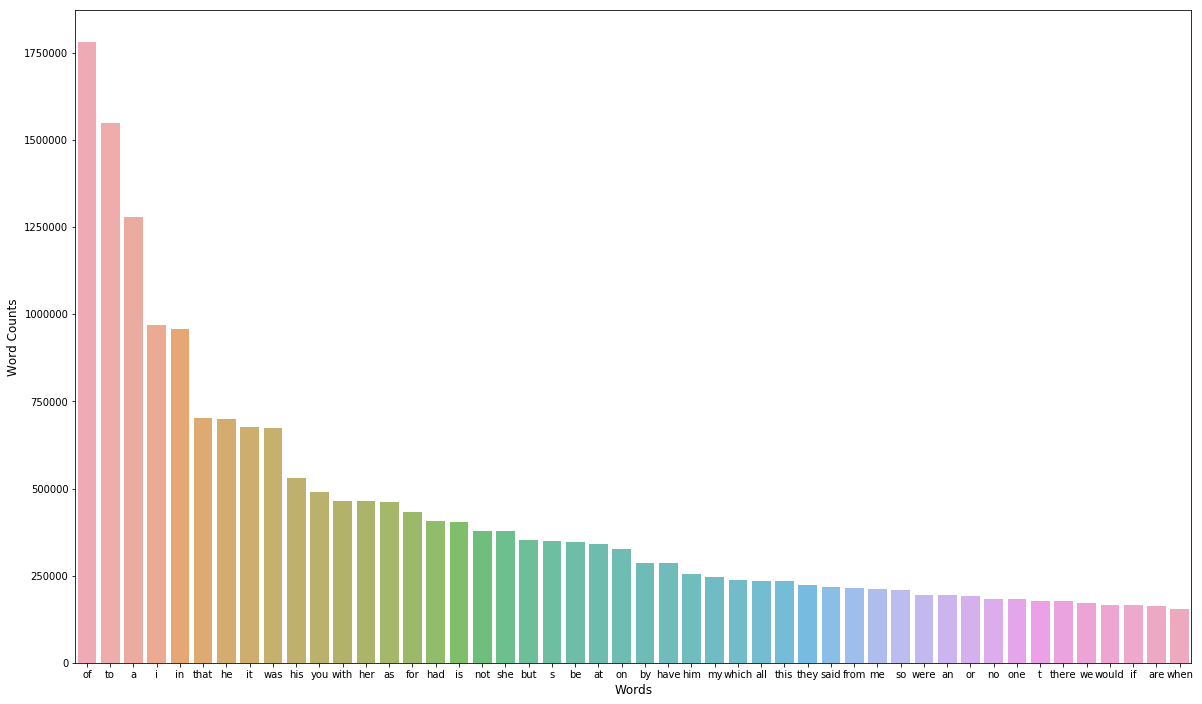

In [5]:
#Distribution of top 50 words in the text corpus without removing stop words
all_words = train_df['text'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(20,12))
sns.barplot(all_words.index.values[2:50], all_words.values[2:50], alpha=0.8)
plt.ylabel('Word Counts', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()

In [6]:
train_df.author.unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50])

In [7]:
#missing authors
[item for item in list(range(1,51)) if item not in train_df.author.unique().tolist()]

[5, 7, 31, 47, 49]

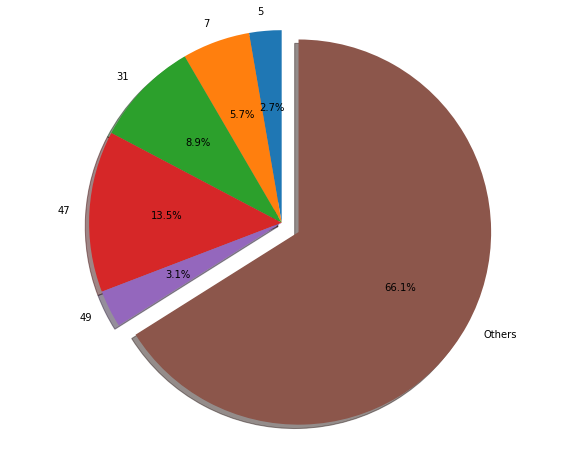

In [8]:
#missing author ratio in testing
missing_authors = [5, 7, 31, 47, 49]
len(test_author[test_author==missing_authors[0]])
labels = [str(x) for x in missing_authors]
sizes = [len(test_author[test_author==x])/len(test_author)*100 for x in missing_authors]
labels.append("Others")
sizes.append(100-sum(sizes))
explode = (0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 2. WordCloud Visualization

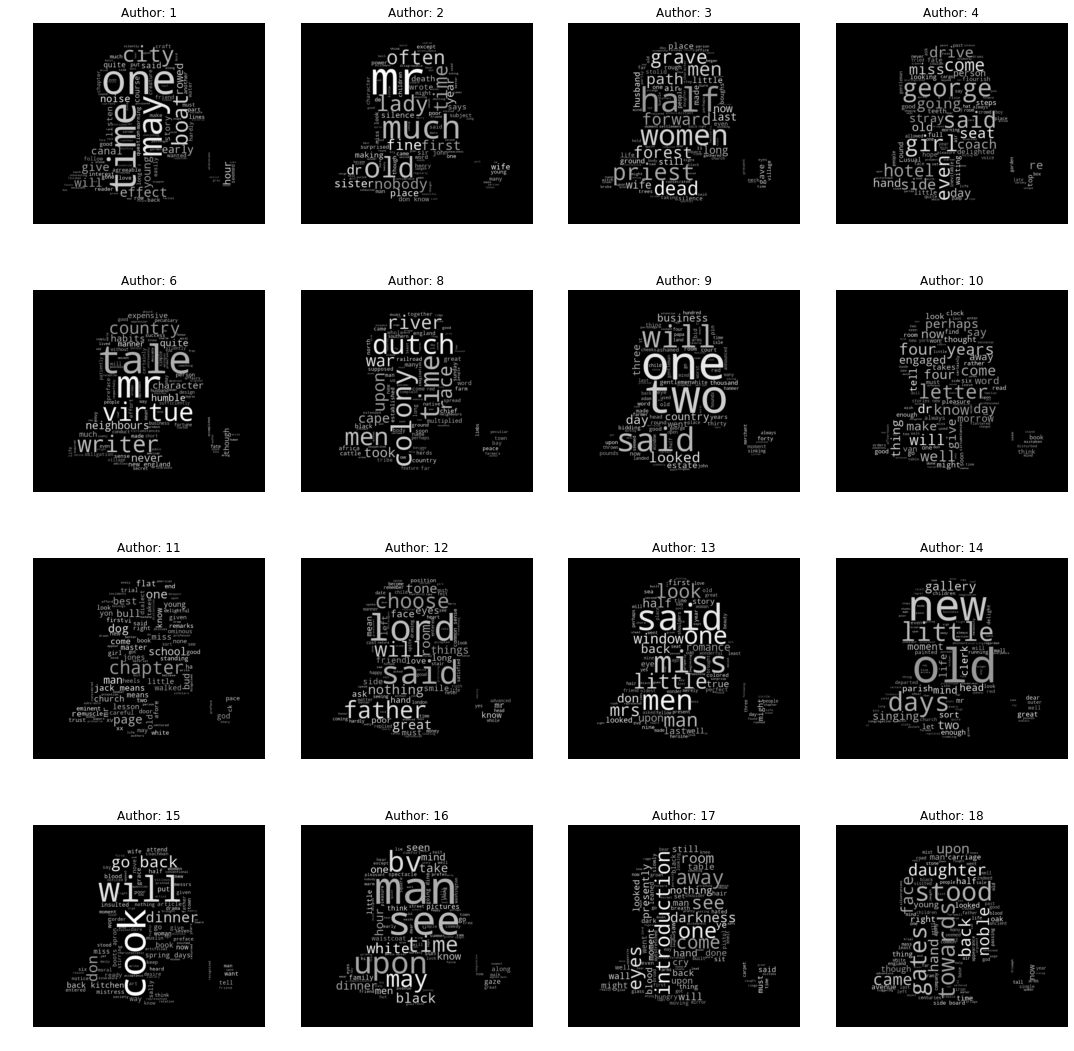

In [9]:
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import numpy as np 
from PIL import Image
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

stopwords = set(STOPWORDS)
oliver_mask = np.array(Image.open('oliver.jpg'))

ncols = 4
nrows = 4
i=1
figsize = [15,15]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    author = train_df.author.unique()[i]
    text = train_df[train_df.author==author]["text"].values
    wc = WordCloud(background_color="black", max_words=100, mask=oliver_mask,
               stopwords=stopwords)
    # generate word cloud
    wc.generate(text[0])
    axi.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
    axi.set_title("Author: "+ str(author))
    axi.set_aspect('equal')
    axi.axis("off")
plt.tight_layout(True)
plt.show()

## 3. Training

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train_df.text.values, train_df.author.values, 
                                                  stratify=train_df.author.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
print (xtrain.shape)
print (xvalid.shape)

(42942,)
(10736,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
%time clf.fit(xtrain_tfv, ytrain)
print("Random Forest:", clf.score(xtrain_tfv, ytrain))
predictions = clf.predict(xvalid_tfv)
print(classification_report(yvalid, predictions))

CPU times: user 1h 26min 37s, sys: 13 s, total: 1h 26min 50s
Wall time: 1min 15s
Random Forest: 1.0
              precision    recall  f1-score   support

           1       0.91      0.22      0.35       182
           2       1.00      0.01      0.03        76
           3       1.00      0.07      0.13        43
           4       0.71      0.29      0.41       297
           6       1.00      0.16      0.28        81
           8       0.29      0.98      0.45      1383
           9       0.84      0.14      0.25       222
          10       1.00      0.61      0.76       151
          11       0.96      0.29      0.44        77
          12       1.00      0.05      0.09       125
          13       1.00      0.10      0.19        97
          14       0.85      0.67      0.75       539
          15       0.91      0.49      0.64       292
          16       1.00      0.16      0.28        37
          17       0.43      0.05      0.08       132
          18       0.93      0.35  

In [13]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

def train_SGD(xtrain_tfv, ytrain, xvalid_tfv, yvalid):
    rbf_feature = RBFSampler(gamma=1, random_state=1)
    X_features = rbf_feature.fit_transform(xtrain_tfv)
    clf = SGDClassifier(n_jobs=-1, max_iter=5)
    clf.fit(X_features, ytrain)   
    clf.score(X_features, ytrain)
    Xvalid_features = rbf_feature.fit_transform(xvalid_tfv)
    predictions = clf.predict(Xvalid_features)
    print(classification_report(yvalid, predictions))

In [14]:
%time train_SGD(xtrain_tfv, ytrain, xvalid_tfv, yvalid)

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       182
           2       0.96      0.59      0.73        76
           3       1.00      0.79      0.88        43
           4       0.98      0.76      0.86       297
           6       0.98      0.77      0.86        81
           8       0.89      0.97      0.93      1383
           9       0.97      0.98      0.98       222
          10       0.99      0.98      0.99       151
          11       0.98      0.74      0.84        77
          12       1.00      0.98      0.99       125
          13       0.99      0.76      0.86        97
          14       0.97      1.00      0.98       539
          15       0.96      1.00      0.98       292
          16       0.95      0.54      0.69        37
          17       0.93      0.80      0.86       132
          18       0.95      0.99      0.97       216
          19       0.90      0.98      0.94       309
          20       0.97    

In [15]:
from numba import jit
import time

@jit
def trial_ctv(xtrain, xvalid):
    ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
                ngram_range=(1, 3), stop_words = 'english')

    # Fitting Count Vectorizer to both training and test sets
    ctv.fit(list(xtrain) + list(xvalid))
    xtrain_ctv =  ctv.transform(xtrain) 
    xvalid_ctv = ctv.transform(xvalid)
    return xtrain_ctv, xvalid_ctv

start = time.time()
xtrain_ctv, xvalid_ctv = trial_ctv(xtrain, xvalid)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

Elapsed (with compilation) = 250.00411558151245


In [16]:
%time train_SGD(xtrain_ctv, ytrain, xvalid_ctv, yvalid)

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       182
           2       0.86      0.87      0.86        76
           3       1.00      0.95      0.98        43
           4       0.84      0.82      0.83       297
           6       1.00      0.90      0.95        81
           8       0.98      0.97      0.98      1383
           9       0.99      0.96      0.97       222
          10       0.97      0.97      0.97       151
          11       0.95      0.90      0.92        77
          12       1.00      0.96      0.98       125
          13       0.91      0.98      0.95        97
          14       0.99      1.00      0.99       539
          15       0.98      0.99      0.98       292
          16       0.73      0.95      0.82        37
          17       0.94      0.91      0.93       132
          18       0.99      0.98      0.99       216
          19       0.99      0.94      0.96       309
          20       0.79    

In [17]:
htv = HashingVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

# Fitting Hashing Vectorizer to both training and test sets
htv.fit(list(xtrain) + list(xvalid))
xtrain_htv =  htv.transform(xtrain) 
xvalid_htv = htv.transform(xvalid)

In [18]:
%time train_SGD(xtrain_htv, ytrain, xvalid_htv, yvalid)

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       182
           2       0.93      0.55      0.69        76
           3       1.00      0.67      0.81        43
           4       0.94      0.72      0.82       297
           6       0.93      0.79      0.85        81
           8       0.90      0.96      0.93      1383
           9       0.95      0.91      0.93       222
          10       0.95      0.96      0.95       151
          11       0.90      0.71      0.80        77
          12       0.99      0.94      0.97       125
          13       0.97      0.71      0.82        97
          14       0.94      0.99      0.97       539
          15       0.94      1.00      0.97       292
          16       0.91      0.57      0.70        37
          17       0.94      0.78      0.85       132
          18       0.92      0.95      0.93       216
          19       0.91      0.96      0.93       309
          20       0.95    

In [19]:
import scikitplot as skplt
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(xtrain_ctv)
clf = SGDClassifier(n_jobs=-1, max_iter=5)
clf.fit(xtrain_ctv, ytrain)   
clf.score(xtrain_ctv, ytrain)
predictions = clf.predict(xvalid_ctv)

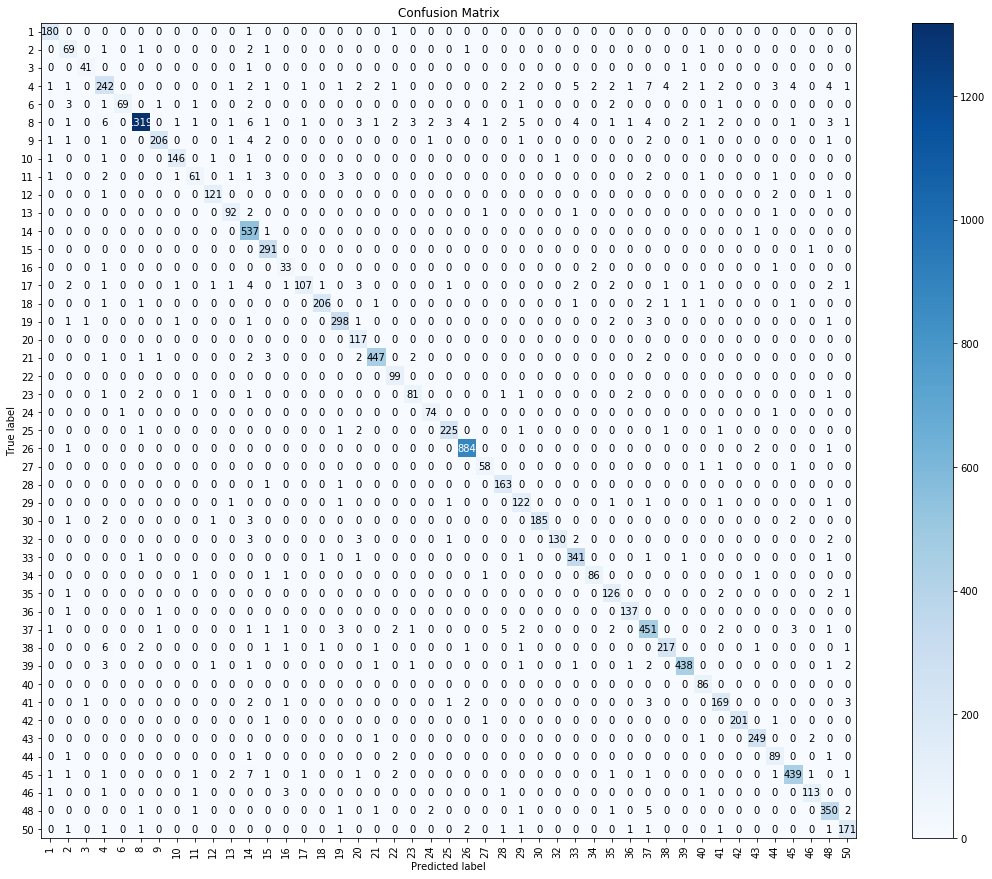

In [20]:
skplt.metrics.plot_confusion_matrix(
    yvalid, 
    predictions,
    labels=train_df.author.unique(),
    x_tick_rotation=90,
    figsize=(20,15))

## 4. Real Time Inference

In [28]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
                ngram_range=(1, 3), stop_words = 'english')

# Fitting Count Vectorizer to both training and test sets
ctv.fit(list(xtrain) + list(xvalid))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [21]:
from ipywidgets import widgets  

# Create text widget for output
output_text = widgets.Text()

# Create text widget for input
input_text = widgets.Text()

# Define function to bind value of the input to the output variable 
def bind_input_to_output(sender):
    output_text.value = input_text.value

# Tell the text input widget to call bind_input_to_output() on submit
input_text.on_submit(bind_input_to_output)

# Display input text box widget for input
input_text


Text(value='')

In [23]:
[output_text.value]

['Have a heart that never hardens, and a temper that never tires, and a touch that never hurts.']

In [24]:
#Preprocessing steps
from bs4 import BeautifulSoup             
import re

def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    return( " ".join( words ))
preprocessed_input = [review_to_words(output_text.value)]

In [31]:
# Display text value of string in output_text variable
tmp_ctv =  ctv.transform(preprocessed_input)
result = clf.predict(tmp_ctv)[0]
print("Your writing is similar to ", author_list[result-1])

Your writing is similar to  Sinclair Lewis


In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.1, solver='sag', n_jobs=-1)
clf.fit(xtrain_ctv, ytrain)
clf.score(xtrain_ctv, ytrain)
result = clf.predict_proba(tmp_ctv)

In [72]:
top_5_idx = np.argsort(result)[0][::-1]
top_5_values = [result[0][i] for i in top_5_idx]

In [76]:
top_5_idx

array([ 5, 39, 33, 44, 30,  0, 21, 28, 36, 43, 10, 27, 40, 15, 18, 41, 16,
       17, 20, 24, 13, 37, 25, 22, 38, 42, 26, 32,  9, 34,  1, 35, 29,  2,
        4,  8,  3, 19, 14,  7,  6, 31, 23, 12, 11])

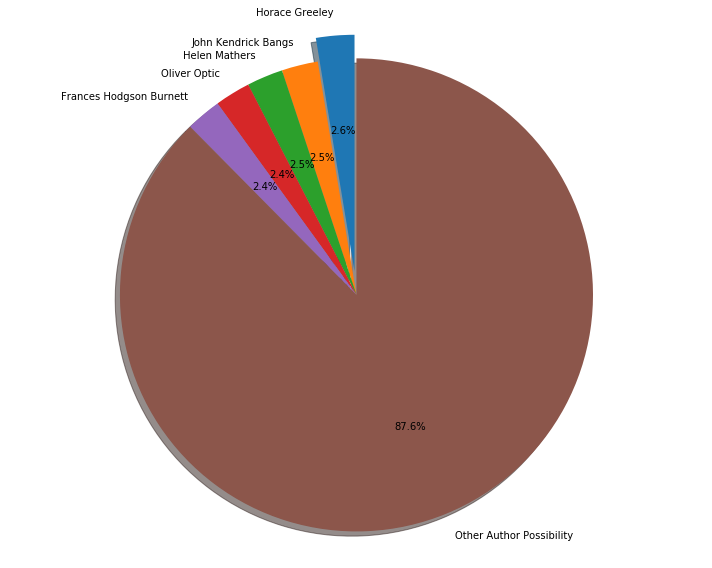

In [79]:
# Pie chart
labels = [author_list[x] for x in top_5_idx[0:5]]
sizes = [x*100 for x in top_5_values[:5]]
labels.append("Other Author Possibility")
sizes.append(100-sum(sizes))
explode = (0.1, 0, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 5. Author Distance (Optional)

In [1]:
from bs4 import BeautifulSoup             
import re
import wikipedia
import pandas as pd
#Read authors
f = open('author_list.txt', 'r')
author_list = f.read().split('\n')
f.close()
author_list.remove("Albert Ross")
author_list.remove("Anne Manning")
author_list.remove("George Moore")
author_list.remove("James Grant")
author_list.remove("William Black")
#Create pre-processing function for wiki pages
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    return( " ".join( words ))

def read_authors_wikipage(author_name):
    #Extract author info from wiki
    return(review_to_words(wikipedia.page(author_name).content))

author_info = {"_".join(author.split(" ")):read_authors_wikipage(author) for author in author_list}
author_info = pd.DataFrame.from_dict(author_info, orient='index', columns=["author_page"])
author_info

,author_page
Arthur_Conan_Doyle,sir arthur ignatius conan doyle may july was a...
Charles_Darwin,charles robert darwin february april was an en...
Charles_Dickens,charles john huffam dickens february june was ...
Edith_Wharton,edith wharton born edith newbold jones january...
George_Eliot,mary ann evans november december alternatively...
Horace_Greeley,horace greeley february november was an americ...
Jack_London,john griffith london born john griffith chaney...
James_Baldwin,james arthur baldwin august december was an am...
Jane_Austen,jane austen december july was an english novel...
John_Muir,john muir april december also known as john of...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
sparse_matrix = count_vectorizer.fit_transform(author_info.author_page.values)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=author_info.index)
df

,aaron,abacus,abandon,abandoned,abandoning,abated,abbey,abbot,abbott,abel,...,zone,zoo,zoological,zoologist,zoologists,zoology,zorn,zulu,zulus,zweites
Arthur_Conan_Doyle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charles_Darwin,0,0,0,1,0,0,2,0,0,0,...,0,1,1,0,1,3,0,0,0,0
Charles_Dickens,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Edith_Wharton,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
George_Eliot,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Horace_Greeley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jack_London,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
James_Baldwin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jane_Austen,0,0,0,2,1,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John_Muir,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
df = pd.DataFrame(data = cosine_similarity(df, df),
                 index = df.index,
                 columns = df.index)
df

,Arthur_Conan_Doyle,Charles_Darwin,Charles_Dickens,Edith_Wharton,George_Eliot,Horace_Greeley,Jack_London,James_Baldwin,Jane_Austen,John_Muir,...,John_Kendrick_Bangs,John_Pendleton_Kennedy,John_Strange_Winter,Lucas_Malet,Marie_Corelli,Oliver_Optic,Sarah_Orne_Jewett,Sarah_Stickney_Ellis,Thomas_Anstey_Guthrie,Thomas_Nelson_Page
Arthur_Conan_Doyle,1.000000,0.108577,0.130166,0.127285,0.142687,0.079108,0.145029,0.099834,0.124035,0.097647,...,0.091021,0.091508,0.134537,0.127193,0.130581,0.099547,0.082673,0.080580,0.101803,0.090900
Charles_Darwin,0.108577,1.000000,0.140729,0.124053,0.156031,0.099158,0.129568,0.110770,0.130425,0.140688,...,0.082769,0.103314,0.100457,0.101323,0.088972,0.087016,0.071991,0.096455,0.087902,0.089101
Charles_Dickens,0.130166,0.140729,1.000000,0.162127,0.193251,0.105370,0.165475,0.139481,0.177407,0.116018,...,0.124644,0.122731,0.167821,0.171326,0.138170,0.131290,0.099137,0.124841,0.113138,0.109709
Edith_Wharton,0.127285,0.124053,0.162127,1.000000,0.178975,0.149222,0.144051,0.162684,0.174349,0.123022,...,0.200651,0.122786,0.143141,0.154036,0.124110,0.116436,0.122535,0.121165,0.112508,0.135019
George_Eliot,0.142687,0.156031,0.193251,0.178975,1.000000,0.112587,0.240442,0.135113,0.208484,0.117879,...,0.160282,0.132050,0.196749,0.247462,0.168156,0.114365,0.128055,0.178996,0.131835,0.099132
Horace_Greeley,0.079108,0.099158,0.105370,0.149222,0.112587,1.000000,0.094097,0.118443,0.085317,0.099609,...,0.235933,0.173546,0.100620,0.066901,0.058881,0.102236,0.073232,0.061477,0.044146,0.092862
Jack_London,0.145029,0.129568,0.165475,0.144051,0.240442,0.094097,1.000000,0.110832,0.130869,0.108730,...,0.313411,0.088785,0.196680,0.134153,0.189728,0.105296,0.091181,0.121852,0.143808,0.083500
James_Baldwin,0.099834,0.110770,0.139481,0.162684,0.135113,0.118443,0.110832,1.000000,0.131312,0.114113,...,0.121525,0.129533,0.093867,0.129069,0.094545,0.097084,0.105561,0.078569,0.098892,0.104693
Jane_Austen,0.124035,0.130425,0.177407,0.174349,0.208484,0.085317,0.130869,0.131312,1.000000,0.106756,...,0.071712,0.096518,0.130165,0.203482,0.133113,0.107072,0.090440,0.121444,0.142045,0.098335
John_Muir,0.097647,0.140688,0.116018,0.123022,0.117879,0.099609,0.108730,0.114113,0.106756,1.000000,...,0.073123,0.115186,0.125960,0.094216,0.080157,0.096236,0.073888,0.075287,0.056799,0.088431


In [4]:
#check values for Charles_Dickens
df.sort_values(by ='Charles_Dickens', ascending=False)["Charles_Dickens"]

Charles_Dickens             1.000000
Charles_Reade               0.198326
Catharine_Maria_Sedgwick    0.196403
George_Eliot                0.193251
Mark_Twain                  0.182574
Jane_Austen                 0.177407
Washington_Irving           0.172408
Lucas_Malet                 0.171326
Frances_Hodgson_Burnett     0.171165
John_Strange_Winter         0.167821
Jack_London                 0.165475
Nathaniel_Hawthorne         0.163443
Edith_Wharton               0.162127
Robert_Louis_Stevenson      0.161153
Joseph_Conrad               0.155261
Thomas_Hardy                0.152780
Theodore_Dreiser            0.145710
Henry_Rider_Haggard         0.144921
Rudyard_Kipling             0.144877
Ralph_Emerson               0.142937
Arlo_Bates                  0.141880
Charles_Darwin              0.140729
Helen_Mathers               0.139709
Fergus_Hume                 0.139505
James_Baldwin               0.139481
George_William_Curtis       0.139414
Marie_Corelli               0.138170
J

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 18.595202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.404671
[t-SNE] KL divergence after 1000 iterations: 1.354017


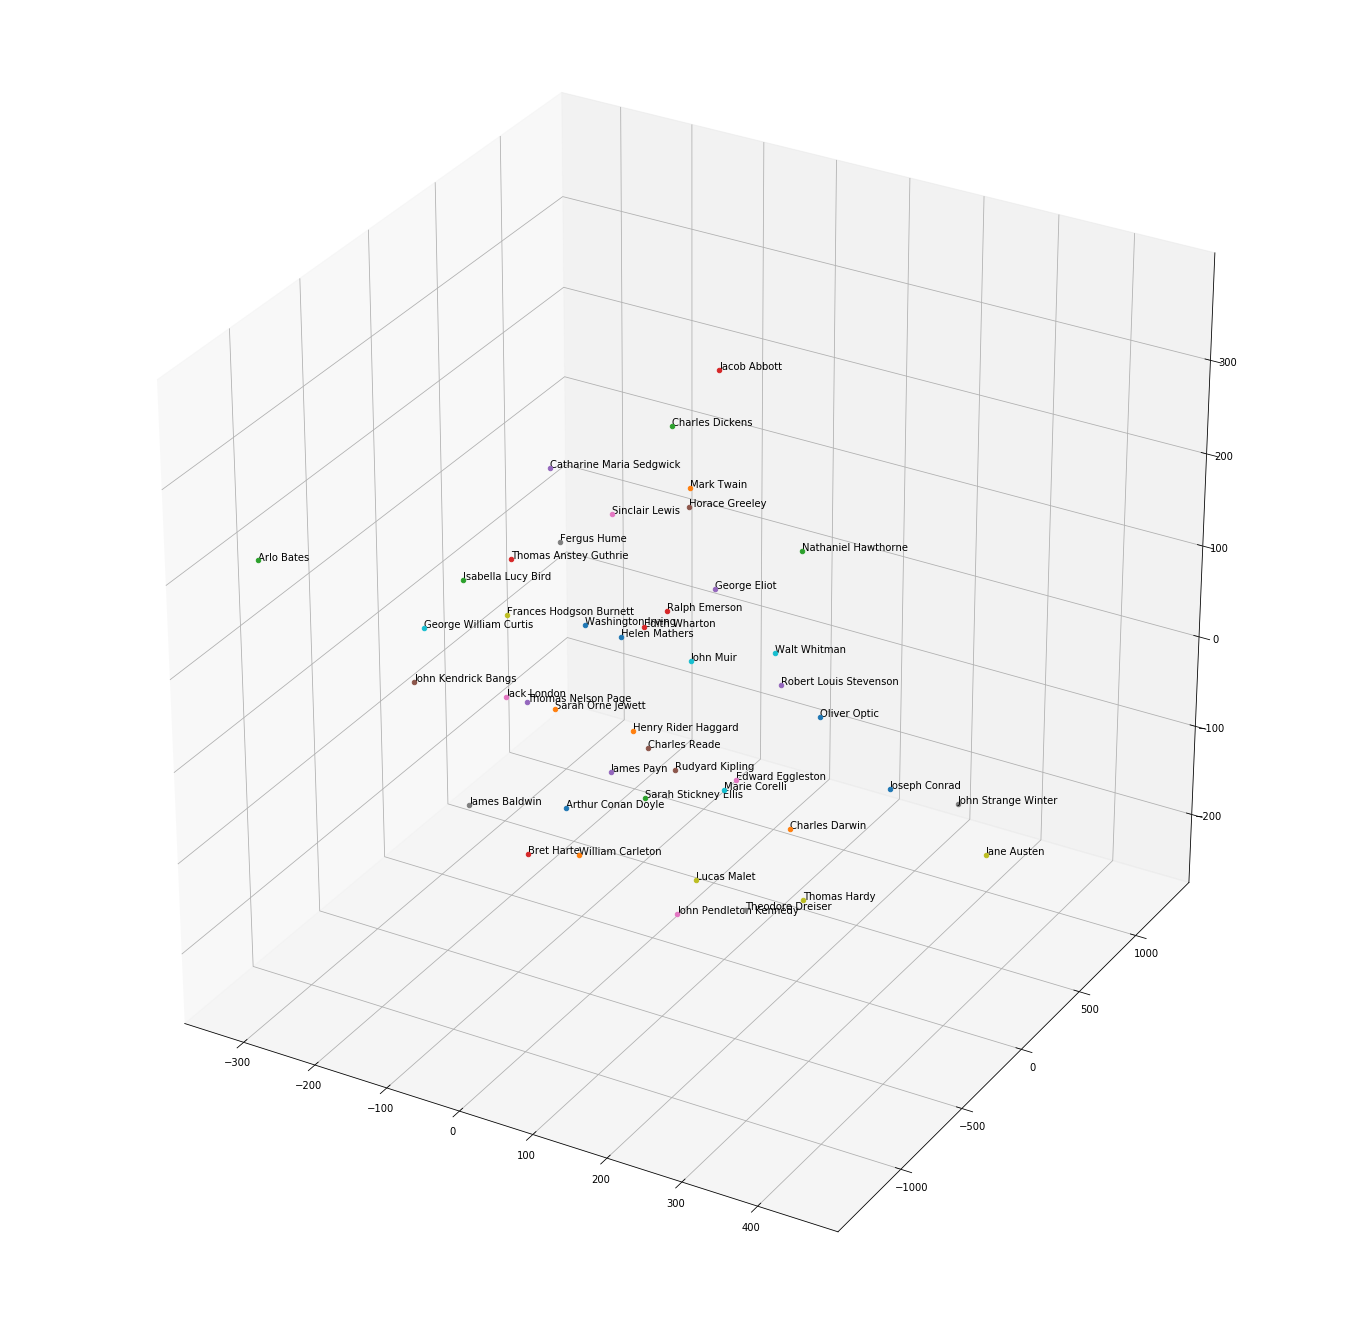

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d') 

tsne_model = TSNE(n_components=3, verbose=1, random_state=0, angle=.99, init='pca')
data2D = tsne_model.fit_transform(doc_term_matrix)

for i, txt in enumerate(author_list):
    ax.scatter(xs=data2D[i,0], ys=data2D[i,1], zs=data2D[i,2], zdir='z', s=20, c=None, depthshade=True)
    ax.text(data2D[i,0], data2D[i,1], data2D[i,2], txt)